In [17]:
import pandas as pd

# Load the dataset
file_path = '100k_a.csv'  # Update the file path as needed
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
print(df.head())

   User ID    Stream ID Streamer username  Time start  Time stop
0        1  33842865744          mithrain         154        156
1        1  33846768288             alptv         166        169
2        1  33886469056          mithrain         587        588
3        1  33887624992              wtcn         589        591
4        1  33890145056         jrokezftw         591        594


In [18]:
# Get basic information about the dataset
print(df.info())

# Get summary statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051733 entries, 0 to 3051732
Data columns (total 5 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   User ID            int64 
 1   Stream ID          int64 
 2   Streamer username  object
 3   Time start         int64 
 4   Time stop          int64 
dtypes: int64(4), object(1)
memory usage: 116.4+ MB
None
            User ID     Stream ID    Time start     Time stop
count  3.051733e+06  3.051733e+06  3.051733e+06  3.051733e+06
mean   5.032313e+04  3.413002e+10  3.146044e+03  3.149186e+03
std    2.889476e+04  1.682242e+08  1.772520e+03  1.772656e+03
min    1.000000e+00  3.380153e+10  0.000000e+00  1.000000e+00
25%    2.528400e+04  3.398884e+10  1.618000e+03  1.620000e+03
50%    5.029900e+04  3.413069e+10  3.174000e+03  3.178000e+03
75%    7.545200e+04  3.427399e+10  4.676000e+03  4.679000e+03
max    1.000000e+05  3.441642e+10  6.147000e+03  6.148000e+03
User ID              0
Stream ID            0
Streamer u

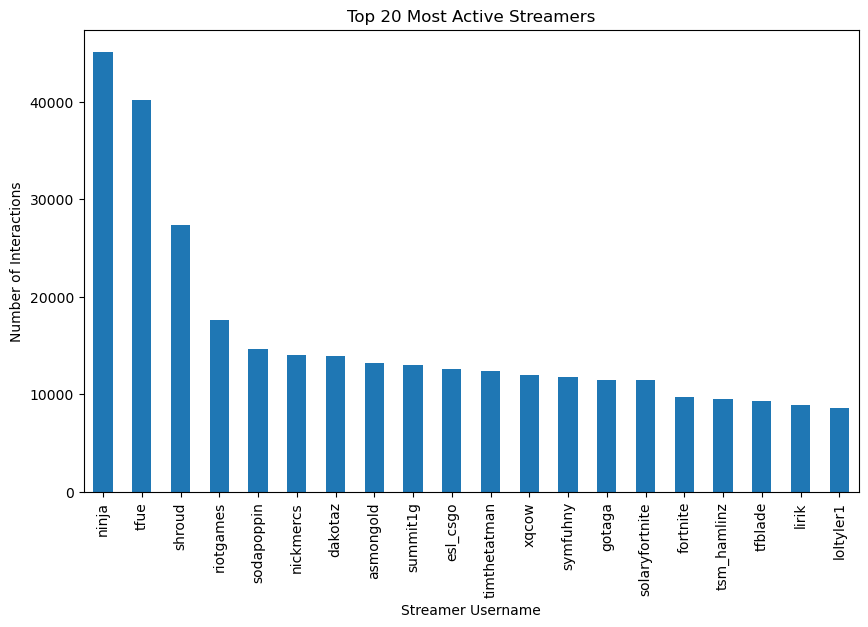

In [19]:
import matplotlib.pyplot as plt

# Count interactions per streamer
streamer_counts = df['Streamer username'].value_counts()

# Plot the top 20 streamers with the most interactions
plt.figure(figsize=(10, 6))
streamer_counts.head(20).plot(kind='bar')
plt.title('Top 20 Most Active Streamers')
plt.xlabel('Streamer Username')
plt.ylabel('Number of Interactions')
plt.show()


In [20]:
df['Time start'] = pd.to_numeric(df['Time start'], errors='coerce')
df['Time stop'] = pd.to_numeric(df['Time stop'], errors='coerce')



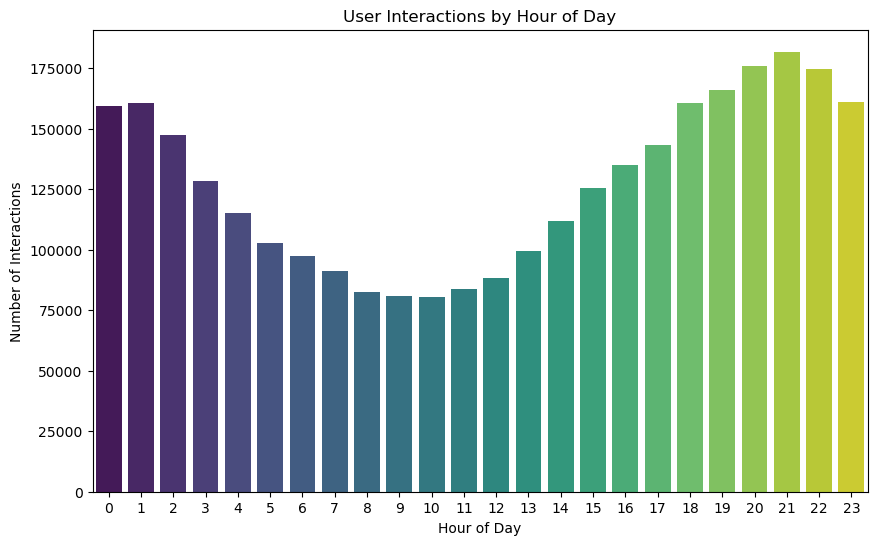

In [21]:
# Add a new column to represent hour of day from Time start (assuming it's 10-minute intervals)
df['Time start hour'] = (df['Time start'] // 6) % 24  # 6 intervals per hour (60 mins / 10 min)

# Plot interactions by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time start hour', palette='viridis')
plt.title('User Interactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.show()


In [23]:
# Calculate the time duration for each row
df['Duration'] = df['Time stop'] - df['Time start']

# Get descriptive statistics for the 'Duration' column
duration_stats = df['Duration'].describe()

print(duration_stats)

count    3.051733e+06
mean     3.142054e+00
std      4.257966e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.700000e+01
Name: Duration, dtype: float64
